In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

In [3]:
sympy.init_printing()

In [4]:
t, k, T0, Ta = sympy.symbols('t, k, T_0, T_a')
T = sympy.Function('T')

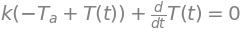

In [7]:
ode = T(t).diff(t)+k*(T(t)-Ta)
sympy.Eq(ode, 0)

In [8]:
ode_sol = sympy.dsolve(ode)

In [9]:
ode_sol

In [10]:
ode_sol.lhs

In [11]:
ode_sol.rhs

In [12]:
ics = {T(0): T0}

In [13]:
ics

In [14]:
C_eq = ode_sol.subs(t, 0).subs(ics)

In [15]:
C_eq

In [16]:
C_sol = sympy.solve(C_eq)

In [17]:
C_sol

In [18]:
ode_sol.subs(C_sol[0])

In [21]:
def apply_ics(sol, ics, x, known_params):
    """
      Apply the initial conditions (ics), given as a dictionary on
      the form ics = {y(0): y0, y(x).diff(x).subs(x, 0): yp0, ...},
      to the solution of the ODE with independent variable x.
      The undetermined integration constants C1, C2, ... are extracted
      from the free symbols of the ODE solution, excluding symbols in
      the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics) for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [22]:
ode_sol

In [23]:
apply_ics(ode_sol, ics, t, [k, Ta])